# Lab - Quantum Optimization

# By Prof Angelakis and team

# Introduction to Quantum Computing MATH303

 In this lab we will go through the following

<b>
    
- Notion of combinatorial optimization and quadratic unconstrained optimization (QUBO)
    
- The MaxCut problem and how it maps to QUBO
    
- The basics of two hybrid-quantum classical algorithm, the QAOA (Quantum approximate optimization algorithm) and the VQE-Variational quantum eigenvalue solved
    
- We will apply these to solve the MaxCut
<b>    




<td colspan="3" align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
    
        
    
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\ketbra}[2]{|#1 \rangle \langle #2|}$
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

# Introduction

<b>Combinatorial Optimization</b>

<div style="text-align: justify">
<i>Combinatorial problems</i> involve finding the most optimal object within a finite set of objects. In many of these problems, an exhaustive search of the set is usually not feasible as the time taken to search through the set grows very quickly with respect to the size of the problems. As such, *heuristic* or *approximate* methods have to be used. Some examples of combinatorial problems are the Max-Cut problem, the Travelling Salesmen Problem, Facility Allocation Problem, and the Job Scheduling Problem, amongst many others. Combinatorial problems are important because of their relevance and numerous applications within the industry. </div>

<b>Cost Function</b>

<div style="text-align: justify">
Optimization problems are formulated in such a way that requires us to minimize or maximize a function. This function is known as the <i>cost function</i> (sometimes called the <i>objective function</i> or <i>loss function</i>) and solving the optimization problem requires finding the optimum inputs such that this cost function is at a minimum/maximum.  </div>


<b>Binary variables</b>

A *binary variable* is a variable that can take only $2$ values, typically $0$ or $1$. This is in contrast to *continuous variables* which we normally deal with in our math classes. 

<b>Quadratic Unconstrained Binary Optimization (QUBO)</b>

Here, we will focus on a type of binary optimization known as <i>Quadratic Unconstrained Binary Optimization</i> (QUBO). A QUBO problem has a cost function of the form 

$$
C = \boldsymbol{x}^T \cdot \boldsymbol{A} \cdot \boldsymbol{x} 
$$

where $\boldsymbol{x}$ is a vector of binary variables, and $\boldsymbol{A}$ is a matrix that is constructed based on the problem you want to solve. A QUBO problem is solved when the optimal vector, $x_{\textrm{opt}}$ consisting of the optimal combination of $1$s and $0$s, is found such that our cost function $C$ is at a minimum. 

QUBO problems are important as many binary optimization problems can be reformulated in terms of a QUBO, leading to a wide range of applications across industries. There are many ongoing efforts being put into solving QUBO problems, and finding a solution to your QUBO problem would also mean finding the solution to your optimization problem of interest. 

We will see later how we can formulate a commonly studied optimization problem, the Max-Cut problem, into a QUBO problem, and how quantum algorithms can help us find solutions to these problems.



<b>Variational Quantum Algorithms</b>

<img src="vqa.png" width="60%" align="center">

<div style="text-align: justify">
Variational Quantum Algorithms (VQA) are a form of <i>hybrid-quantum classical algorithms</i>. These algorithms have a classical component which is executed on a classical computer, and a quantum component which involves a quantum computer. VQAs are typically used to solve problems which requires the quantum computer to output a specific state. A quantum circuit is used to initialize qubits in a trial state, and a classical <i>feedback loop</i> (implemented on a classical computer) is used to tweak the parameters of the quantum circuit such that the circuit outputs the desired quantum state.  </div>



# Max-Cut


Given a set of nodes (sometimes called <i>vertices</i>) connected by some edges, how can we divide the nodes into two groups such that the number of edges between the two groups is maximized?

<img src="mc11.png" width="15%" align="middle">


Take for example, the graph above with 4 nodes with edges connecting them. Shown below are some ways in which we can divide the nodes into two groups, where the circled nodes are in one group and the remaining nodes in the other. However, only the last method of grouping the nodes has the greatest number of edges between the two groups.

<img src="mc2.png" width="15%" align="middle">

In general, given $N$ number of nodes, there are $2^N$ possible ways of grouping the nodes. Due to this *exponential scaling*, we can see that going through every possible way of grouping the variables and checking how many edges are between the two groups can become time consuming very quickly. 

<b>Binary variables</b>

Using the example graph above, we can assign binary variables to each of the nodes. Starting from the top-left node and going clockwise, we will label them $x_0$, $x_1$, $x_2$, and $x_3$. These $x_i$'s are what we call the binary variables. If $x_i =0$, it means that the $i^{\textrm{th}}$ node is in one group, and if $x_i=1$, then it is in the other group. We can then represent our groupings using a bitstring. Using the example above, our grouping is $0101$ which is also the optimal solution.

<b>Formulating as a QUBO problem</b>

[1] Glover, F., Kochenberger, G. and Du, Y., 2018. A tutorial on formulating and using QUBO models. arXiv preprint arXiv:1811.11538.

The cost function for a QUBO problem is written as $C = \boldsymbol{x}^T \cdot \boldsymbol{A} \cdot \boldsymbol{x}$. From above, we see that we require $4$ binary variables in our problem, $x_0$, $x_1$, $x_2$, and $x_3$. This means that our vector $\boldsymbol{x}$ will consist of $4$ elements, $\boldsymbol{x} = [x_0, x_1, x_2, x_3]$ and our matrix $\boldsymbol{A}$ will be of size $4\times4$.

The matrix $\boldsymbol{A}$ is dependent on the problem we want to solve and in this case, based on the structure of our graph. The diagonal elements of our matrix tells us how many other nodes each node is connected to and the off-diagonal elements tell us which other nodes a particular node is connected to. If node $i$ is connected to node $j$ in our graph, we put a $-1$ in row $i$ and column $j$ in our matrix. 



$$
\boldsymbol{A} = \mymatrix{rrrr}{2 & -1 & 0 & -1 \\ -1 & 2 & -1 & 0 \\ 0 & -1 & 2 & -1 \\ -1 & 0 & -1 & 2}
$$



The cost function for our max-cut problem can be written as:

$$C(\textbf{x}) = \mymatrix{r}{x_0 & x_1 & x_2 & x_3} \cdot \mymatrix{rrrr}{2 & -1 & 0 & -1 \\ -1 & 2 & -1 & 0 \\ 0 & -1 & 2 & -1 \\ -1 & 0 & -1 & 2} \cdot \mymatrix{rrrr}{x_0 \\ x_1 \\ x_2 \\ x_3}$$

where $x_i$ and $x_j$ can only take values $0$ or $1$. The cost function for our Max-Cut problem tells us the number of edges that have been cut when we look at a specific method of grouping the nodes into two groups (i.e. 1100, 1010, etc).

Note: Any <i>maximization</i> problem can be re-formulated into a <i>minimization</i> problem and vice versa and for the purposes of this notebook, are interchangeable.

<b>Example:</b>
    
For our square graph above, we have the labels for each variable (starting from the top left and going clockwise) as $x_0, x_1, x_2$ and $x_3$. The solution to our Max-Cut problem is $\left[x_0, x_1, x_2, x_3 \right] = 0101$, which means that $x_0$ and $x_2$ are in one group  with $x_1$ and $x_3$ in the other group.
    
Calculating our cost function:

$$\begin{aligned}
C(\textbf{x}) & = \mymatrix{r}{0 & 1 & 0 & 1} \cdot \mymatrix{rrrr}{2 & -1 & 0 & -1 \\ -1 & 2 & -1 & 0 \\ 0 & -1 & 2 & -1 \\ -1 & 0 & -1 & 2} \cdot \mymatrix{rrrr}{0 \\ 1 \\ 0 \\ 1}\\
& = \mymatrix{r}{-2 & 2 & -2 & 2} \cdot \mymatrix{rrrr}{0 \\ 1 \\ 0 \\ 1}\\
& = 4
\end{aligned}
$$

<b>Quiz:</b> Are there other optimal solutions besides $\left[x_0, x_1, x_2, x_3 \right] = 0101$? If there are, what is the cost function value for these solutions?

# Quantum Approximate Optimization Algorithm





<b>QAOA: Introduction</b>

The Quantum Approximate Optimization Algorithm (QAOA), is a variational quantum algorithm designed by Farhi et al.[1] in an attempt so solve combinatorial algorithms on quantum computers. Below we can see the variational loop

<img src="qaoa_qc1.png" width="65%" align="center">

Each binary variable in the problem is represented by a qubit, and each basis state of the set of qubits represents a possible classical solution to the problem. We want to find a quantum state $|\psi_p(\vec{\gamma},\vec{\beta})\rangle$, that depends on some real parameters $\vec{\gamma},\vec{\beta}$, which has the property that it maximizes the expectation value of the <i>problem Hamiltonian</i> $H_P$ (denoted as C in the above figure). The objective is to search for the parameters $\vec{\gamma},\vec{\beta}$ that maximize $ \langle \psi_p(\vec{\gamma},\vec{\beta})|H_p|\psi_p(\vec{\gamma},\vec{\beta})\rangle$. 

<b>Constructing the problem Hamiltonian</b>

The problem Hamiltonian $H_P$ is problem dependent and is constructed based on looking at which nodes are connected together. The problem Hamiltonian for our graph is given as: 

$$\begin{align}
H_P & = \frac{1}{2}\big(Z_0 \otimes Z_1 \otimes I_2 \otimes I_3\big) + 
        \frac{1}{2}\big(I_0 \otimes Z_1 \otimes Z_2 \otimes I_3\big) +
        \frac{1}{2}\big(Z_0 \otimes I_1 \otimes I_2 \otimes Z_3\big) +
        \frac{1}{2}\big(I_0 \otimes I_1 \otimes Z_2 \otimes Z_3\big)\\
\end{align}
$$ 

Maximizing $ \langle \psi_p(\vec{\gamma},\vec{\beta})|H_p|\psi_p(\vec{\gamma},\vec{\beta})\rangle$ will therefore give us the state that corresponds to a classical solution that maximizes our Max-Cut cost function $C(\textbf{x})$.

<b>Creating our circuit</b>

The QAOA is a variational algorithm that uses a unitary $U(\vec{\beta}, \vec{\gamma})$ characterized by the <i>variational parameters</i> $\vec{\beta}$ and $\vec{\gamma}$ to prepare the quantum state $\ket{\psi(\vec{\beta},\vec{\gamma})}$. We want to find the optimal parameters $(\vec{\beta}_{opt}, \vec{\gamma}_{opt})$ such that the 
quantum state $\ket{\psi(\vec{\beta}_{opt}, \vec{\gamma}_{opt})}$ represents the best classical solution to our problem. 

The unitary $U(\beta, \gamma)$ is composed of two unitaries $U(\beta) = e^{-i \beta H_B}$ and $U(\gamma) = e^{-i \gamma H_P}$
where $H_B$ is the <i>mixing Hamiltonian</i> and $H_P$ is the <i>problem Hamiltonian</i>.

The mixing Hamiltonian  $H_B$ is typically written as

$$
\begin{align}
H_B & = \big(X_0 \otimes I_1 \otimes I_2 \otimes I_3 \big) + 
      \big(I_0 \otimes X_1 \otimes I_2 \otimes I_3 \big) +
      \big(I_0 \otimes I_1 \otimes X_2 \otimes I_3 \big) +
      \big(I_0 \otimes I_1 \otimes I_2 \otimes X_3 \big)\\
\implies U(\beta) & = e^{-i \beta H_B} = e^{-i \beta X_0}e^{-i \beta X_1}e^{-i \beta X_2}e^{-i \beta X_3}
\end{align}
$$

Therefore, $U(\beta)$ can be seen as a rotation of every qubit about the $x$-axis by an angle of $2\beta$.

Using our Problem Hamiltonian $H_P$ above, 

$$
U(\gamma) = e^{-i \gamma H_P} = e^{-i \gamma Z_0 Z_1}e^{-i \gamma Z_1 Z_2}e^{-i \gamma Z_2 Z_3}e^{-i \gamma Z_0 Z_3}
$$

Note: Strictly speaking, the problem Hamiltonian comes from mapping the Max-Cut problem to the <i>Ising Hamiltonian</i> in physics, which will leave us with an extra constant term at the end of $H_P$. However, this term does not contribute to our overall results, and can usually be omitted.

The state is prepared by applying alternating blocks of the two unitaries $p$ times such that 

$$\ket{ \psi(\vec{\beta}, \vec{\gamma}) } = \underbrace{U(\beta_1) U(\gamma_1) U(\beta_2) U(\gamma_2) 
                                            \cdots U(\beta_p) U(\gamma_p)}_{p \; \text{times}} 
\ket{\psi_0}$$

where $\ket{\psi_0}$ is a our initial state, usually $\ket{\psi_0} = \ket{+}^{\otimes N}$.



<b>Steps:</b>
     
1. Pick our initial values of $\beta$ and $\gamma$
2. Repeat the following until a <i>convergence criteria</i> is satisfied:
    1. Prepare the state $\ket{\psi(\vec{\beta}, \vec{\gamma})}$ using our circuit
    2. Measure the output state of our circuit
    3. Compute $ \langle \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rvert H_P \lvert \psi(\boldsymbol{\beta}, \boldsymbol{\gamma}) \rangle $ 
    4. Find new set of parameters $(\boldsymbol{\beta}_{\textrm{new}}, \boldsymbol{\gamma}_{\textrm{new}})$ using a classical optimization algorithm
    5. Set current parameters $(\boldsymbol{\beta}, \boldsymbol{\gamma})$ equal to the new parameters 
      $(\boldsymbol{\beta}_{\textrm{new}}, \boldsymbol{\gamma}_{\textrm{new}})$





<b>Implementing QAOA in Python</b>

In [1]:
import networkx as nx
import numpy as np
import time
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def cmplot(circ, measurementcounts):
    job = execute(circ,Aer.get_backend('qasm_simulator'),shots=measurementcounts,  max_parallel_threads=1)
    data = job.result().get_counts(circ)
    fig_len, fig_height = 7,5
    if len(data) > 16:
        fig_len = 20
    return plot_histogram(data, figsize=(fig_len,fig_height))

print("Modules imported")

Modules imported




We will demonstrate these steps using the Max-Cut problem discussed above. We begin by drawing the graph in Python, and drawing the circuit that implements both the unitaries. We use the package `networkx` to help us visualize our graph.

A graph can be represented as an <i>adjacency matrix</i>, which is a matrix containing information about which nodes are connected to each other. We will use `networkx` to create the graph and convert them to adjacency matrices which we can use in Python.

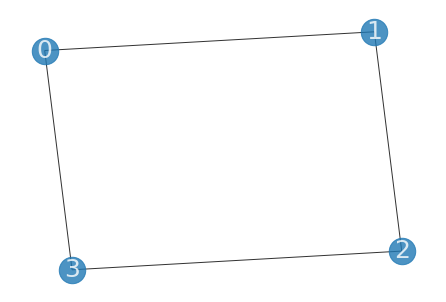

In [2]:

G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

my_pos = nx.spring_layout(G, seed = 262) 
nx.draw(G,pos = my_pos, with_labels=True, alpha=0.8, node_size=700, 
        font_size=25,font_color='white')

# If you get error "random_state_index is incorrect", follow the steps below:
# 1) Run Anaconda Prompt
# 2) Run the command "pip install decorator==5.0.7"

We construct our mixing and problem unitaries using quantum gates in Qiskit. The mixing unitary is a rotation around the x-axis on all qubits by an angle $2\beta$. The problem unitary is a series of CNOT and $R_z$ rotations that is dependent on how the graph is connected. The adjacency matrix tells us which nodes are connected to each other and we can easily use it to apply our gates on the correct qubits.

Our mixing unitary:


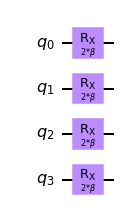

In [13]:
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.circuit import Parameteroutput='mpl'

nqubits = 4

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
    

print("Our mixing unitary:")    
qc_mix.draw(output='mpl')

Our problem unitary:


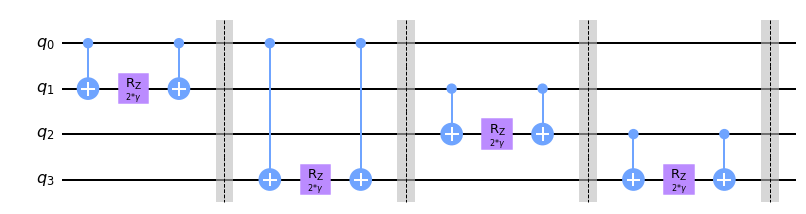

In [14]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()
    
print("Our problem unitary:")
qc_p.decompose().draw(output='mpl')

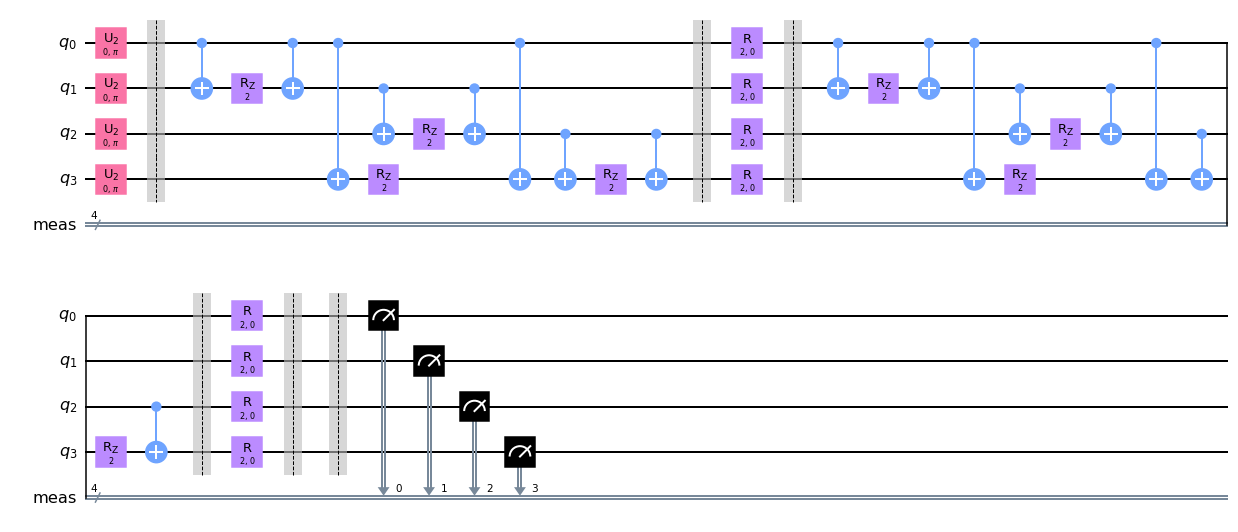

In [15]:
# Putting our circuit together:

P = 2

def qaoa_circ(G, theta): # Creates the QAOA circuit
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    qc.barrier()
    
    for irep in range(0, p):
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])
        qc.barrier()

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
        qc.barrier()
            
    qc.measure_all()
        
    return qc

qaoa_circ(G, [1 for x in range(2*P)]).decompose().draw(output='mpl')

<b>Finding the optimal parameters</b>

As mentioned earlier, QAOA is a hybrid variational quantum algorithm which uses a classical outer loop optimizer to find the best parameters for our trial state. The optimizer which we will be using is called [COBYLA](https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/algorithms/optimizers/cobyla.py), a comomnly used gradient-free optimizer. 

In this section, we create a function that will calculat the cost function value for us based on the input parameters $\beta$ and $\gamma$. We can then feed this function into our minimzer which will find the optimal parameters for us. 

In [6]:
# Additional functions to calculate the cost function value so we can pass it
# to our optimizer (COBYLA).


def maxcut_obj(x, G): # calculates cost function for max cut
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1           
    return obj


def cal_cf(theta, G, shots): 
    global cflistqaoa
    # Calculates the cost function value for a set of gamma and beta values

    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    qc = qaoa_circ(G, theta)
    
    counts = backend.run(qc, seed_simulator=10, 
                         nshots=shots).result().get_counts()
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    cflistqaoa.append(avg/sum_count)
    return avg/sum_count

print("Functions created")

Functions created


Begin optimization for P = 2 and 1000 measurments...
Optimization complete. Time taken: 0.429s.

Final cost function value: -3.26953
Number of optimizer iteraions: 59
Optimal parameters: [7.60506835 1.92798904 1.79969513 0.97112889]


Text(0.5, 0, 'Number of COBYLA iterations')

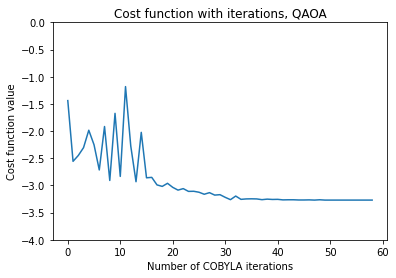

In [7]:
from scipy.optimize import minimize

cflistqaoa = []

P = 2
n_measurements = 1000
initial_vector = np.random.uniform(0,2*np.pi, 2*P)

print("Begin optimization for P = %.d and %.d measurments..." %(P,n_measurements))
time1 = time.time()
opt = minimize(cal_cf, initial_vector, args=(G, n_measurements), method = 'COBYLA')
print("Optimization complete. Time taken: %.3fs." %(time.time()-time1))
print()
print("Final cost function value: %.5f" %opt.fun)
print("Number of optimizer iteraions: %.d" %opt.nfev)
print("Optimal parameters:", opt.x)
opt_params = opt.x


plt.plot(cflistqaoa)
plt.ylim(-4,0)
plt.title("Cost function with iterations, QAOA")
plt.ylabel("Cost function value")
plt.xlabel("Number of COBYLA iterations")


Finally, we can plot our results using a histogram. We notice that the bitstrings "0101" and "1010" have the highest probability and are indeed the assignments of the graph (we started with) that gives 4 edges between the two partitions. 

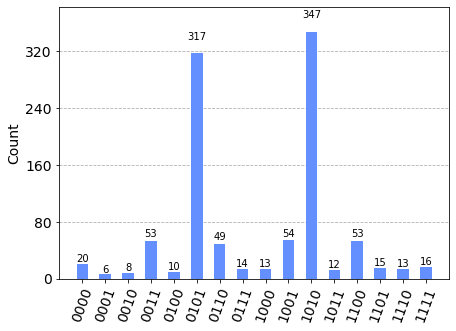

In [8]:
qc_res = qaoa_circ(G, opt_params)
cmplot(qc_res, n_measurements)

# Hardware efficient VQA

<b>Introduction</b>

<img src="v_hardware.png" width="40%" align="right">

<div style="text-align: justify">
Hardware efficient VQAs are similar to the QAOA algorithm above. The main difference between them is the circuit used to generate the trial states. In QAOA, we used a unitary evolution that was specific to the problem. In hardware efficient VQAs, we use gates that can be easily implemented on our quantum hardware.</div>


Hardware efficient approaches are useful because depending on the nature of the problem, the unitary evolution to implement QAOA can become very difficult as many gates are required. In an imperfect quantum computer, any noise within these operations add up very quickly and having many gates means that your output will contain many errors.


In hardware efficient approaches, circuits can get by with fewer gates. The gates used can also be chosen such that they are easily implemented, and the user is free to pick gates with the least noise. 

As with QAOA, each binary variable in the problem is represented by a qubit, and each basis state of the set of qubits represents a possible classical solution to the problem. We use a circuit with adjustable parameters $\vec{\theta}$ to generate the states for us. The objective is to search for the parameters $\vec{\theta}$ that maximize $ \langle \psi_p(\vec{\theta})|H_p|\psi_p(\vec{\theta})\rangle$. 

<b>Constructing the problem Hamiltonian</b>

The cost function we want to minimize remains the same, $C = \langle H_p \rangle = \langle \psi_p(\vec{\theta})|H_p|\psi_p(\vec{\theta})\rangle$. Therefore, we can use the same Hamiltonian as before.

$$\begin{align}
H_P & = \frac{1}{2}\big(Z_0 \otimes Z_1 \otimes I_2 \otimes I_3\big) + 
        \frac{1}{2}\big(I_0 \otimes Z_1 \otimes Z_2 \otimes I_3\big) +
        \frac{1}{2}\big(Z_0 \otimes I_1 \otimes I_2 \otimes Z_3\big) +
        \frac{1}{2}\big(I_0 \otimes I_1 \otimes Z_2 \otimes Z_3\big)\\
\end{align}
$$ 


<b>Finding the optimal state</b>

We use a circuit to generate the states for us. It is up to us to design the circuit, and we are free to do so however we want. 

There are some things to keep in mind. A circuit that is too short may struggle to find the right solution as the optimal state can only be produced with a very specific set of parameters. Likewise,  a circuit that is too long may cause issues with the classical optimizer as there are too many parameters to adjust and finding the optimal parameters may become difficult. You can experiment with the depth of the circuit to see what works best for you.



<b>Steps:</b>
    
1. Pick our initial values of $\theta$
2. Repeat the following until a <i>convergence criteria</i> is satisfied:
    1. Prepare the state $\ket{\psi(\vec{\theta})}$ using our circuit
    2. Measure the output state of our circuit
    3. Compute $ \langle \psi(\boldsymbol{\theta}) \rvert H_P \lvert \psi(\boldsymbol{\theta}) \rangle $ 
    4. Find new set of parameters $(\boldsymbol{\theta}_{\textrm{new}})$ using a classical optimization algorithm
    5. Set current parameters $(\boldsymbol{\theta})$ equal to the new parameters 
      $(\boldsymbol{\theta}_{\textrm{new}})$





<b>Implementation in Python</b>

We begin by creating a function that lets us create the QUBO matrix from an input graph. We will be using the same square graph as above.

Remember that any maximization problem can be converted into a minimization problem by multiplying the cost function by $-1$. In this case, we notice that the matrix obtained is a factor of $-1$ away from our original Max-Cut matrix above.

In [9]:
def get_qubomat(graph):
    # Adjacency is essentially a matrix which tells you which nodes are connected.
    matrix = np.array(nx.adjacency_matrix(graph).todense())
    nvar = len(matrix)
    
    for k in range(nvar):
        matrix[k][k] = -np.sum(matrix[k])
    return matrix

Amat = get_qubomat(G)
print(Amat)

[[-2  1  0  1]
 [ 1 -2  1  0]
 [ 0  1 -2  1]
 [ 1  0  1 -2]]


The next thing to do would be to create your circuit. Using what you have learned from previous sessions on adding single- and multi- qubit gates to your circuit, you may give it a go at designing your own hardware efficient circuit.

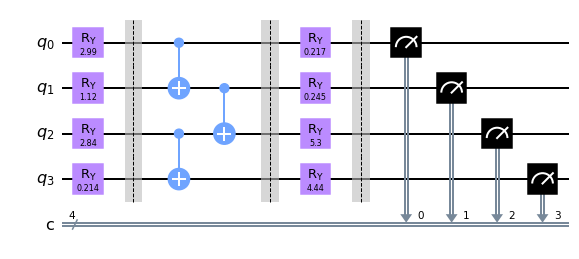

In [10]:


nq4 = 4
nparam = 8

def circuit(nq, parameters): # Creating our circuit
    qc = QuantumCircuit(4,4)
    
    # Your circuit here
    
    for k in range(nq4):
        qc.ry(parameters[k], k)
        
    qc.barrier()  
        
    qc.cx(0,1)
    qc.cx(2,3)
    qc.cx(1,2)
    
    qc.barrier()  
        
    for k in range(nq4):
        qc.ry(parameters[nq+k], k)
        
    qc.barrier()    
    for k in range(nq):
        qc.measure(k,k)

    return qc


test_params = np.random.uniform(0,2*np.pi,nparam)
tserk = circuit(nq4,test_params)
tserk.draw(output='mpl')


With our circuit, we can create a function that takes in the parameters to our circuit and calculates the cost function value for us.

We will pass this function, along with our initial set of angles, to the optimizer COBYLA, which will attempt to find the optimal angles such that the final output state of the circuit represents the solution that minimizes the cost function.

Begin optimization for hardware efficient VQA and 10000 measurments...
Optimization complete. Time taken: 2.536s.

Final cost function value: -3.99240
Number of optimizer iteraions: 92
Optimal parameters: [3.23882813 1.94488644 4.77740128 1.58936485 6.174213   1.24930193
 4.68224547 4.65101424]


Text(0.5, 0, 'Number of COBYLA iterations')

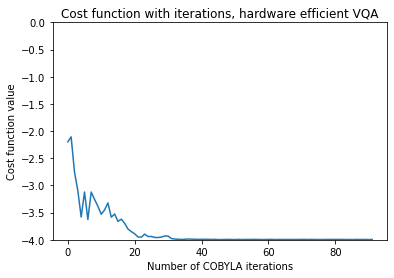

In [11]:
cflistVQA=[]

def vqa_cf(parameters, matrix, number_of_measurements):
    global cflistVQA
    
    nq = len(matrix) # Number of qubits = number of variables = length of matrix
    vqa_circuit = circuit(nq, parameters)
    
    job = execute(vqa_circuit,Aer.get_backend('qasm_simulator'),shots=number_of_measurements,  max_parallel_threads=1)
    counts = job.result().get_counts(vqa_circuit)
    
    cf = 0
    for bitstr, count in counts.items():   
        bitstring = np.array([int(x) for x in bitstr])
        cf += ((bitstring.dot(matrix)).dot(bitstring))*count
    cf = cf/number_of_measurements
    
    cflistVQA.append(cf)
    return cf


n_measurements = 10000
initial_vector = np.random.uniform(0,2*np.pi, 2*nparam)

print("Begin optimization for hardware efficient VQA and %.d measurments..." %(n_measurements))
time1 = time.time()
opt = minimize(vqa_cf, test_params, args=(Amat, n_measurements), method = 'COBYLA')
print("Optimization complete. Time taken: %.3fs." %(time.time()-time1))
print()
print("Final cost function value: %.5f" %opt.fun)
print("Number of optimizer iteraions: %.d" %opt.nfev)
print("Optimal parameters:", opt.x%(2*np.pi))
vqa_opt_params = opt.x

plt.plot(cflistVQA)
plt.ylim(-4,0)
plt.title("Cost function with iterations, hardware efficient VQA")
plt.ylabel("Cost function value")
plt.xlabel("Number of COBYLA iterations")


Plotting our results in a histogram, we notice that the bitstrings "0101" or "1010" have the have the highest probabilities of occuring and are indeed the assignments of the graph (that we started with) that gives 4 edges between the two partitions.  

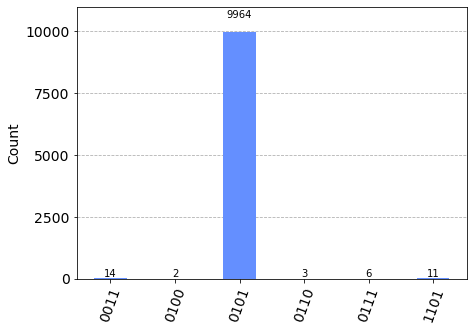

In [12]:
vqa_plot = circuit(len(Amat), vqa_opt_params)
cmplot(vqa_plot, n_measurements)